# DEF-D Fysieke Ontwerpopdracht 1 invul template

## Groepsgegevens en planning 

Aan het einde van deze ontwerpopdracht lever je als groep dit notebook gezamenlijk in via een pull request op Github en lever je een link naar dit pull request in op Brightspace. Zet jullie studienummers en namen in onderstaande tabel zodat wij zeker weten dat het groepsvormen goed is gegaan. Werk in de juiste branch.

| Groep: 3     |  |
| :-------------|:-------------|
| Zulfiqar Alwani|6281265|
| Ben Geertman| 6529100|
| Victor Arets| 6437184 |

| Planning Groep: 3     |Tijdstip / Tijdspanne  |
|---|---|
| Mijlpaal 1: Criteria opgesteld | 1140 |
| Mijlpaal 2: Eerste kalibratie meting gedaan| 1500 |
| Pauze 1| 1230-1330 |
| Pauze 2| 1500-1520 |
| laatste metingen en verslag afmaken | 1530-1700 |

## *Opdracht 1*: Foto van alle schetsen.

Zet de foto in dezelfde map als dit notebook en verander hieronder de naam in de naam van de foto.

![Alt](foto_schetsen.jpg "analyse: ideeen")

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|HALL | stroom in hoogspanningskabels | Het magnetisch veld moet gedetecteerd met een range van 0 tot 2 $\mu T$, hierbij is een onzekerheid van 0,1 $\mu T$ acceptabel <br> Het achtergrond magnetisch veld (van 30 tot 60 $\mu T$) moet weggefilterd worden. <br> |
|KRACHT | Een digitale weegschaal | De sensor moet een gewicht tussen de 0 en de 600 g meten met een onzekerheid van 10% <br> |
|LICHT | Vermogen zonneboiler meten | Zonlicht van tussen de 150 tot 400 $W/m^2$ meten, met een nauwkeurigheid van 5 $W/m^2$ <br> Dit gemeten vermogen om kunnen zetten naar een totale toegevoegde energie voor de boiler. <br> De warmteuitstroom moet geschat kunnen worden, tot een error van 10%, waardoor de temperatuur van het water geschat kan worden, ook op 10%. <br> |


Groep 3 heeft gekozen voor sensor Kracht. 

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
Licht kort toe wat er in de foto te zien is.
 ![Alt](schetsOpstelling.jpeg "schets student")

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? 
gewicht op de sensor
2. Over welk bereik ga je deze variabelen veranderen?
tussen de 0 en de 600 g
3. Wat ga je allemaal meten?
De output van de sensor 
4. Hoeveel metingen ga je doen?
2 metingen per gewicht, 10 gewichten
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen?
ja, omdat we de nauwkeurigheid van 10 % kunnen controleren en zien of deze binnen het bereik van 0-600 g werkt.

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is.
 ![Alt](opstelling1.jpeg "meetopstelling student")
 ![Alt](opstelling2.jpeg "meetopstelling student")

## *Opdracht 6*: Meten en fitten, Leerdoel

In [1]:
# Zet hier jouw data in een voor jou handig formaat
import numpy as np

gewicht = np.array([218.9, 218.9, 294.0, 294.0,
                    527.4, 527.4, 598.3, 598.3,
                    140.0, 140.0, 56.4, 56.4,
                    411.1, 411.1, 99.6, 99.6,
                    422.9, 422.9, 378.8, 378.8])

metingen = np.array([609, 610, 701, 701,
                     796, 790, 834, 835,
                     435, 436, 87, 88,
                     758, 759, 333, 333,
                     775, 775, 706, 707])

u_gewicht = 0.2
u_metingen = np.array([8, 4, 8, 8, 
                       1, 1, 1, 1,
                       1, 1, 1, 2,
                       2, 2, 3, 1,
                       1, 1, 1, 1])


Fit parameters:
a = 308.29 ± 10.93
b = -1101.85 ± 60.98


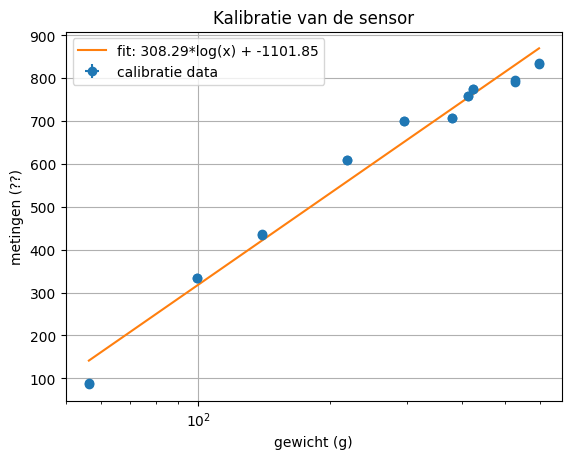

De sensor heeft een nauwkeurigheid van 0.04.


In [2]:
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fit (x, a, b):
    return a*np.log(x) + b

popt, pcov = curve_fit(fit, gewicht, metingen)

a, b = popt
u_a, u_b = np.sqrt(np.diag(pcov))

x_fit = np.linspace(min(gewicht), max(gewicht), 100)
y_fit = fit(x_fit, *popt)

print('Fit parameters:')
print('a = {:.2f} ± {:.2f}'.format(a, u_a))
print('b = {:.2f} ± {:.2f}'.format(b, u_b))
plt.figure()
plt.errorbar(gewicht, metingen, xerr=u_gewicht, yerr=u_metingen, label='calibratie data', fmt='o')
plt.plot(x_fit, y_fit, label='fit: {:.2f}*log(x) + {:.2f}'.format(a, b))
plt.xlabel('gewicht (g)')
plt.xscale('log')
plt.ylabel('metingen (??)')
plt.title('Kalibratie van de sensor')
plt.legend()
plt.grid()
plt.show()

print(f'De sensor heeft een nauwkeurigheid van {(u_a/a):.2f}.')

## *Opdracht 7*: Iteratie nodig?

Nee, de sensor voldoet aan de criteria. (en we hebben geen tijd meer...)

De sensor heeft binnen het bereik van 0-600 g een nauwkeurigheid van 4%, dit is beter dan de 10% die we als criterium hadden gesteld.

## *Opdracht 8*: Conclusie, leerdoel

Uit deze calibratie blijkt dat de sensor geschikt is als digitale weegschaal voor gewichten tussen de 0 en de 600 g. De sensor is echter erg onhandig om te gebruiken, want het is erg gevoelig voor draaingen of minimale verplaatsingen van gewichten. Voor een vervolg onderzoek/opdracht zou er een criterium toegevoegd kunnen worden over de gebruiksvriendelijkheid. Voor de curvefit hebben we een logaritmisch verband ten opzichte van de x-as gebruikt, want dit gaf de beste resultaten. 
Verder was de precisie van de metingen erg goed, wat aangeeft dat de sensor betrouwbaar is. De nauwkeurigheid van 4% is ook binnen de gestelde criteria van 10%, wat betekent dat de sensor geschikt is voor het meten van gewichten in deze range.

## *Opdracht 9*: Aantonen leerdoelen beheersing

Om aan te tonen dat je de leerdoelen beheerst, kopieer je hieronder alle cellen met 'leerdoel' in de titel. Zet zelf de cellen onder de goede kopjes. Mogelijk komt een cel bij meerdere leerdoelen terug.

### Leerdoel 1: Simpele circuits (RC-circuit, spanningsdelers met sensoren) ontwerpen en fabriceren.

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is.
 ![Alt](opstelling1.jpeg "meetopstelling student")
 ![Alt](opstelling2.jpeg "meetopstelling student")

### Leerdoel 2: Ontwerpeisen voor een opdracht SMART opstellen en vervolgens de ontwerpcyclus inrichten, rekening houdend met de randvoorwaarde van de opdracht.

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|HALL | stroom in hoogspanningskabels | Het magnetisch veld moet gedetecteerd met een range van 0 tot 2 $\mu T$, hierbij is een onzekerheid van 0,1 $\mu T$ acceptabel <br> Het achtergrond magnetisch veld (van 30 tot 60 $\mu T$) moet weggefilterd worden. <br> |
|KRACHT | Een digitale weegschaal | De sensor moet een gewicht tussen de 0 en de 600 g meten met een onzekerheid van 10% <br> |
|LICHT | Vermogen zonneboiler meten | Zonlicht van tussen de 150 tot 400 $W/m^2$ meten, met een nauwkeurigheid van 5 $W/m^2$ <br> Dit gemeten vermogen om kunnen zetten naar een totale toegevoegde energie voor de boiler. <br> De warmteuitstroom moet geschat kunnen worden, tot een error van 10%, waardoor de temperatuur van het water geschat kan worden, ook op 10%. <br> |


Groep 3 heeft gekozen voor sensor Kracht. 

## *Opdracht 8*: Conclusie, leerdoel

Uit deze calibratie blijkt dat de sensor geschikt is als digitale weegschaal voor gewichten tussen de 0 en de 600 g. De sensor is echter erg onhandig om te gebruiken, want het is erg gevoelig voor draaingen of minimale verplaatsingen van gewichten. Voor een vervolg onderzoek/opdracht zou er een criterium toegevoegd kunnen worden over de gebruiksvriendelijkheid.

Voor de fit is een logaritmisch verband ten opzichte van de x-as gebruikt. Hierbij kwamen we op het beste resultaat.

### Leerdoel 3: Voor een gegeven sensor & analoog-digitaal convertor en gegeven (of zelf gekozen) toepassing een kalibratie meting ontwerpen, inclusief het circuit om de sensor aan te sluiten op de analoog-digitaal convertor, de opstelling bouwen, en meetresultaten verwerken en concluderen of de combinatie van sensor en analoog-digitaal conversie geschikt is voor de toepassing.

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is.
 ![Alt](opstelling1.jpeg "meetopstelling student")
 ![Alt](opstelling2.jpeg "meetopstelling student")

## *Opdracht 6*: Meten en fitten, Leerdoel

In [3]:
# Zet hier jouw data in een voor jou handig formaat
import numpy as np

gewicht = np.array([218.9, 218.9, 294.0, 294.0,
                    527.4, 527.4, 598.3, 598.3,
                    140.0, 140.0, 56.4, 56.4,
                    411.1, 411.1, 99.6, 99.6,
                    422.9, 422.9, 378.8, 378.8])

metingen = np.array([609, 610, 701, 701,
                     796, 790, 834, 835,
                     435, 436, 87, 88,
                     758, 759, 333, 333,
                     775, 775, 706, 707])

u_gewicht = 0.2
u_metingen = np.array([8, 4, 8, 8, 
                       1, 1, 1, 1,
                       1, 1, 1, 2,
                       2, 2, 3, 1,
                       1, 1, 1, 1])


Fit parameters:
a = 308.29 ± 10.93
b = -1101.85 ± 60.98


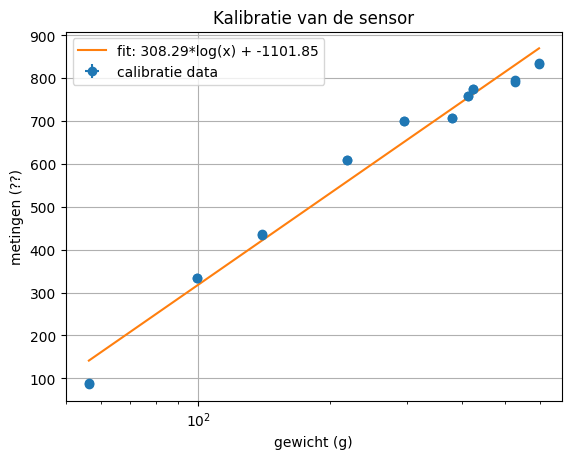

De sensor heeft een nauwkeurigheid van 0.04.


In [4]:
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fit (x, a, b):
    return a*np.log(x) + b

popt, pcov = curve_fit(fit, gewicht, metingen)

a, b = popt
u_a, u_b = np.sqrt(np.diag(pcov))

x_fit = np.linspace(min(gewicht), max(gewicht), 100)
y_fit = fit(x_fit, *popt)

print('Fit parameters:')
print('a = {:.2f} ± {:.2f}'.format(a, u_a))
print('b = {:.2f} ± {:.2f}'.format(b, u_b))
plt.figure()
plt.errorbar(gewicht, metingen, xerr=u_gewicht, yerr=u_metingen, label='calibratie data', fmt='o')
plt.plot(x_fit, y_fit, label='fit: {:.2f}*log(x) + {:.2f}'.format(a, b))
plt.xlabel('gewicht (g)')
plt.xscale('log')
plt.ylabel('metingen (??)')
plt.title('Kalibratie van de sensor')
plt.legend()
plt.grid()
plt.show()

print(f'De sensor heeft een nauwkeurigheid van {(u_a/a):.2f}.')